In [1]:
import random
random.seed(0)
import pandas as pd
import numpy as np
np.random.seed(0)
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

# Super Statistics

This lesson is designed to orient you to statistical thinking and give you practice with Python's statistics library (`scipy`).

The assignment will be a mixture of reading informative pages, watching videos, and answering questions. Please do your best and seek help as needed!

### Learning Goals

By the end of the lesson, students should be able to:

* Part 1
    * Explain the concept of probability vs. statistics
* Part 2
    * Generate data using a distribution function from `scipy`
* Part 3
    * Given a dataset, generate and interpret appropriate summary statistics using `scipy`
    * Classify data as continuous, categorical, or binary
    * Differentiate between paired and unpaired data
    * Apply logarithms to manipulate a distribution
* Part 4
    * Determine the distribution of a dataset using `scipy`
    * Describe and justify the use of parameteric vs. non-parameteric statistics
* Part 5
    * Create and interpret a statistical hypothesis
    * Given a dataset, perform and interpret correlation analysis using `scipy`
    * Given a hypothesis and dataset, perform and interpret an appropriate statistical test using `scipy`
    * Explain the concept of statistical significance
* Part 6
    * Describe and explain the purpose of effect sizes
    * Calculate an effect size

### Caveat

I want to start by admitting that I am not as good at statistics as I am at Computer Science. I did distinctly *okay* in my undergraduate statistics class. I would even say that I didn't genuinely learn statistics until I got to graduate school, and had my own datasets. However, that was the turning point - I suddenly understood things so much better when I had a context I cared about. Context is key to learning - I believe statistics is very challenging for many folks because they don't see how it applies to things they are interested in.

You might walk into this assignment with more statistics knowledge than me, or alternatively you might be a complete novice. Either way, I'd like to make sure everyone leaves the assignment better than they were. This will probably include me, Dr. Bart. If you identify mistakes or errors, don't be afraid to raise them up in the Discord or the Ohyay. I am only human, this assignment was created in a single day, and I don't have a huge background in statistics. Errors or even misconceptions are likely! I'd rather we all collaboratively improve, then have been right.

# Part 1) Basic Statistics

Watch the following video, and then answer the following questions below.

<https://youtu.be/PufDBlSsqys>

#### Q1.1)
What is the difference between probablity and statistics? Define both terms clearly, especially in terms of their different goals.

# Part 2) Distributions

#### Q2.1)

In statistics, what is a "Random Variable"? How is it different from an Algebraic Variable or a Computer Science Variable?

#### Q2.2)
In statistics, what is a "Probability Distribution"?

#### Q2.3)

In Discrete Math, what is a "Function"?

#### Q2.4)

What is the relationship between a random variable and the concept of a "nullary function" like the following?

In [19]:
def X(): return random.randint(0, 10)

[X() for i in range(10)]

[6, 0, 4, 8, 7, 6, 4, 7, 5, 9]

#### Q2.5) 
What is the relationship between a distribution and a function?

Watch the following video about different probability distributions:

<https://youtu.be/b9a27XN_6tg>

#### Q2.6)

For each of the following probability distributions:

1. Provide the name of the distribution
2. Identify it as continuous, discrete, or both
3. Provide a brief description of the distribution and what it is used for
4. Find an example from the real world where this distribution occurs (not one presented in the video)
5. Provide a link to the appropriate `scipy.stats` function
6. Use the `scipy` module's distribution functions to create an visual example

##### Uniform Distribution

* Description: A random variable where all of outcomes are equally likely.
* Kind: Can be both continuous or discrete
* Example: Rolling a fair, six-sided die.
* Link: [Continous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform), [Discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)


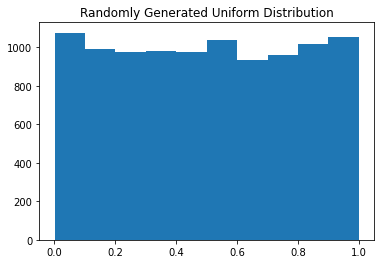

In [34]:
random_variables = stats.uniform.rvs(size=10000)
plt.hist(random_variables)
plt.title("Randomly Generated Uniform Distribution")
plt.show()

##### Bernouli Distribution

##### Binomial Distribution

##### Poisson Distribution

##### Normal Distribution

##### Student's T Distribution

##### Chi-Squared Distribution

##### Exponential Distribution

##### Logistic Distribution

# Part 3) Summary Stats

For this section, you will need to use Google and ask questions.

#### Q3.1)
When should you use mean vs. median?

Mean is a better measure for normal datasets with few outliers, while median is a better measure for heavily skewed distributions or distributions with significant outliers. This is because the median is not sensitive to the severity of extreme points. For example, if a dataset has all values 1-10 and one point with value 100, that 100 will increase the mean, but not the median.

#### Q3.2)
What is the standard deviation and variance?

Variance is the average squared difference between each point and the mean, and standard deviation is the square root of variance. They are used to measure the spread of the data.

#### Q3.3)

Describe the tradeoffs between providing the standard deviation/variance vs. the 5-number summary. 

The standard deviation/variance provide more information more quickly, as it summarizes the spread of the data with just one number, as opposed to having to consider multiple numbers in context. However, since standard deviation and variance exclusively show the average of the differences, it does not show the presence or direction of any skew or outliers in the distribution like a 5 number summary could.

#### Q3.4)

What is skew? Can a skewed dataset still be normally distributed?

Skew is a description of the asymmetry of the data. Skewed data is often described to have a "tail" of less dense values on one side. No, skewed data cannot be normally distributed, as normally distributed data is generally symmetrical.

#### Q3.5)
What is a frequency table? How is it useful for describing data?

A frequency table is a way to represent data, where all values of the variable are listed (either in ranges or single values) alongside the number of times those values occurred. While frequency tables are very specific, showing the exact frequency, a histogram shows basically the same thing with the added visual component of a graph.

#### Q3.6)

Observe the data shown below and classify each column shown below as either: nominal, binary, ordinal, or quantitative.

In [3]:
skyscrapers_full = pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/skyscrapers/skyscrapers.csv")
# You can ignore how we calculate the fields, though it might help you understand it better
skyscrapers_full['tall?'] = skyscrapers_full['statistics.height'] > 100
skyscrapers_full['development.phase'] = skyscrapers_full['status.current'].map(lambda s: 3 if s in ('completed', 'demolished')
                                                                                         else 1 if s in ('proposed', 'vision')
                                                                                         else 2)
skyscrapers = skyscrapers_full[['id', 'material', 'name', 'development.phase',
                                'location.city', 'location.latitude', 'location.longitude',
                                'statistics.height', 'tall?']]
skyscrapers.head()

,id,material,name,development.phase,location.city,location.latitude,location.longitude,statistics.height,tall?
0,12,steel,The Illinois,1,Chicago,0.000000,0.000000,1609.359985,True
1,62,composite,Chicago Spire,2,Chicago,41.889889,-87.614861,609.599976,True
2,68,composite,Miglin-Beitler Skyneedle,1,Chicago,41.881618,-87.634354,609.489990,True
3,98,composite,One World Trade Center,3,New York City,40.713112,-74.013351,541.299988,True
4,14269,concrete,Central Park Tower,2,New York City,40.766361,-73.980949,541.020020,True


* `id`: Nominal
* `material`: Nominal
* `name`: Nominal
* `development.phase`: Ordinal 
* `location.city`: Nominal
* `location.latitude`: Quantitative
* `location.longitude`: Quantitative
* `statistics.height`: Quantitative
* `tall?`: Binary

#### Q3.7)

For each column in the dataset above, provide appropriate summary statistics in whatever way makes the most sense to concisely describe the data.

In [5]:
print("ID:")


print("Material:")


print("Name:")


print("Development Phase:")


print("Location (City):")


print("Location (Latitude):")


print("Location (Longitude):")


print("Height:")


print("Tall Buildings:")

ID:
count     2431.000000
mean     11482.640889
std       6694.202957
min         12.000000
25%       4130.500000
50%      11440.000000
75%      16575.000000
max      24079.000000
Name: id, dtype: float64
Material:
Name:
Development Phase:
Location (City):
Location (Latitude):
Location (Longitude):
Height:
Tall Buildings:


#### Q3.8)

Classify each of the following scenarios as "paired" or "unpaired" data.

1. We draw two random samples from the complete set of skyscrapers. Both samples have 100 skyscrapers.

Unpaired

2. We collect a new version of the dataset, updating the `"development.phase"` value in order to compare it to the old value.

Paired

3. We collect data about the architectures of each building, in order to see if there a relationship between the builder's age and the height of the building.

Paired

# Part 4) Normality Checks

Read the following page about normality tests:

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/


#### Q4.1)

Some skyscrapers are much taller than most skyscrapers. Demonstrate this by creating a Histogram of that data.

In [ ]:
skyscrapers['statistics.height']
# ...

#### Q4.2)

Logarithmic transformations are often used in situations like this to make the visualizations easier to read.
Why?

#### Q4.3)

Create a new version of your visualization that is log transformed, by manipulating the data.

Hints:
* You might find it helpful to increase the number of bins in the final version to produce a nicer looking graph.
* Some of the data is dirty - remove zeroes!

#### Q4.4)

We wish to know if the data is now normally distributed. You can use a Shapiro Wilks test in `scipy.stats` to determine if a distribution is normal. This is demonstrated below.

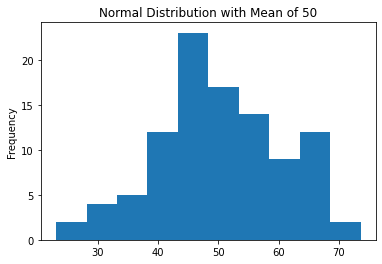

Normally Distributed Values: 0.9873840808868408 0.4639612138271332 False
Since the pvalue is greater than 0.05, we accept the null hypothesis that it is normally distributed.


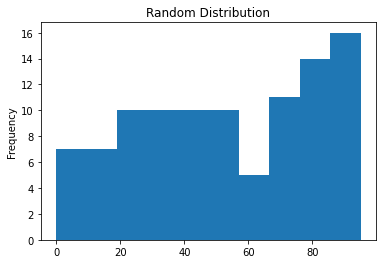

Random Values: 0.9455756545066833 0.0004289667122066021 True
Since the pvalue is less than 0.05, we reject the null hypothesis that it is normally distributed.


In [125]:
# Mean of 50, standard deviation of 10, create 100 numbers
normal_values = stats.norm.rvs(loc=50, scale=10, size=100)
plt.hist(normal_values)
plt.title("Normal Distribution with Mean of 50")
plt.ylabel("Frequency")
plt.show()

test_statistic, p_value = stats.shapiro(normal_values)
print("Normally Distributed Values:", test_statistic, p_value, p_value < .05)
print("Since the pvalue is greater than 0.05, we accept the null hypothesis that it is normally distributed.")

# Mean of 50, standard deviation of 10, create 100 numbers
normal_values = stats.randint.rvs(low=0, high=100, size=100)
plt.hist(normal_values)
plt.title("Random Distribution")
plt.ylabel("Frequency")
plt.show()

test_statistic, p_value = stats.shapiro(normal_values)
print("Random Values:", test_statistic, p_value, p_value < .05)
print("Since the pvalue is less than 0.05, we reject the null hypothesis that it is normally distributed.")

Building off our example, determine if:

1. The original untransformed heights follow a normal distribution.
2. The log-transformed heights follow a normal distribution.

Be sure to use an appropriate test.

#### Q4.5)

Would it be appropriate to use parameteric statistics on this data?

# Part 5) Correlation Analysis

Read over the following page: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2996580/

#### Q5.1)

In your own words, define the following terms:

1) Hypothesis

2) Hypothesis Test

3) P-value

4) Null Hypothesis

5. "Approaching Significance" (read over [this webpage](https://mchankins.wordpress.com/2013/04/21/still-not-significant-2/))

#### Q5.2)

Make a list of all the criteria you should consider when choosing an appropriate statistical test.
Additionally, embed a flowchart that can help visually demonstrate the critiera you should use.

1. 
2.
3.

...

#### Q5.3)

For each of the following statistical test functions from `scipy`, provide the following information:

* Function: The name of the function in Scipy
* Link: The URL to the documentation of the test.
* Test: A more human-readable name of the test
* Description: A quick one-sentence description of the test indicating clearly what it is used for
* Assumptions: A list of any assumptions made by the test.
* Example: An example of how you might use this test

##### f_oneway

* Function: `f_oneway`
* Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
* Test: One-way ANOVA
* Description: A parametric test for 2+ independent samples to determine if they have the same population mean. 
* Assumptions:
    * Samples must be independent
    * Population is normally distributed
    * Populations' standard deviations are equal
* Example: Take a big group of students, break them up by gender, and see if their heights differ by gender.

##### pearsonr

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### spearmanr

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### pointbiseralr

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### kendalltau

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### ttest_1samp

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### ttest_ind

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### ttest_rel

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### chisquare

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### mannwhitneyu

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### kstest

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### wilcoxon

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

##### kruskal

* Function:
* Link:
* Test:
* Description:
* Assumptions:
* Example:

#### Q5.4)

For each scenario below, identify what test you might choose.

1. If we wished to test whether there was any association between Gender and uptake of Flu vaccination which would be the best test to choose?

2. If we wished to test if there was a difference between the gestational age of babies at birth (how far along the pregnancy is, in weeks) and the use of a nutritional supplement by their mothers during pregnancy which would be the best test to choose?

3. The cotinine level was measured in women at the beginning and end of their pregnancy. The change in cotinine was presented on a Log scale. Which would be the best test to use to see if there had been a change in cotinine level during pregnancy?

4. If we wished to estimate the strength of the linear relationship between the weight of a mother and the weight of her baby at birth which would be the best test to choose?

5. The pre-operative and post-operative anxiety levels of adolescent patients undergoing orthopaedic surgery were measured using the State-Trait Anxiety Inventory STAI scale. The authors reported the pre-operative anxiety levels as mean = 33.8 (SD = 5.1) and post-operative anxiety levels as mean = 38.8 (SD = 7.2). They also performed a Shapiro-Wilks Test demonstrating that the data is normal. Which would have been the most appropriate test to assess the relationship between pre and post operative anxiety?

6. Salaries in the United States are heavily skewed. If you were investigating salaries between Software Engineers and non-Software Engineers, which test would be most appropriate?

7. As previously mentioned, salaries in the United States are heavily skewed. You conduct a survey of 100 folks (selected completely at random from the US), asking their salary and their "satisfaction their salary" with the possible responses "Very Happy", "Happy", "Neutral", "Unhappy", and "Very Unhappy". What test could you use to determine the relationship between these two values?

8. It is 2022, and the revolution has begun. It is chaos in the streets, and societal upheaval is everywhere. Strangely, you are more interested in doing data science, and are now investigating whether salaries are still skewed. You go back to the 100 folks you talked to previously, and ask them for their new salary data. What test can help you determine if there is a change?

#### Q5.5)

Recall the skyscrapers data we looked at before.

In [150]:
skyscrapers.head()

,id,material,name,development.phase,location.city,location.latitude,location.longitude,statistics.height,tall?
0,12,steel,The Illinois,1,Chicago,0.000000,0.000000,1609.359985,True
1,62,composite,Chicago Spire,2,Chicago,41.889889,-87.614861,609.599976,True
2,68,composite,Miglin-Beitler Skyneedle,1,Chicago,41.881618,-87.634354,609.489990,True
3,98,composite,One World Trade Center,3,New York City,40.713112,-74.013351,541.299988,True
4,14269,concrete,Central Park Tower,2,New York City,40.766361,-73.980949,541.020020,True


Is there a relationship between a Skyscrapers latitude and height?

Are `New York City` skyscrapers bigger than `Chicago` skyscrapers?

In the dataset, completed skyscrapers are phase 3, in-progress skyscrapers are phase 2, and not-started skyscrapers are phase 1.
Considering only skyscrapers made with concrete and steel, is there a difference in the distribution of the different development phases between the two materials? 

development.phase,1,2,3
material,,,
concrete,99,162,1105
steel,9,10,856


# Part 6) Effect Sizes

Watch the videos, and answer the questions.

https://youtu.be/PyNzbDbjs1Y

#### Q6.1)

Why is it important to present p-values AND effect sizes?

#### Q6.2)

The video briefly suggests some ways to calculate effect size. For each of the following, give a brief explanation:


* Pearson Correlation: 
* R Squared: 
* Cohen's d Effect Size: 
* Eta Squared:
* Odds Ratio:

#### Q6.3)

Watch the following video, then answer the question below.

https://youtu.be/6uYNVCy-8NA

In the video, the speaker suggests concrete ways to interpret effect sizes. However, Cohen warned about turning effect size numbers into ideas of "small", "medium", and "large". What is dangerous about interpreting effect size values?

#### Q6.4)

Your arch-nemesis stands up and reports, "In our study, we found a significant difference between the control group and the treatment group. Clearly, my research team deserves more funding." You raise your hand to ask a question - what do you ask?

#### Q6.5)

Previously, you were asked to calculate whether there was a significant difference between `New York City` and `Chicago` skyscrapers. Now provide a measure of effect size to fully characterize their difference.